In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

# rcParams['figure.figsize'] = 18,8

In [ ]:
series = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',parse_dates=True)
series.head(5)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [ ]:
qs = series['Quarter'].str.replace(r'(Q\d)_(\d\d)', r'\2-\1')

series['Quarter'] = pd.PeriodIndex(qs, freq='Q').to_timestamp()
series

series.set_index('Quarter',inplace=True)

<ipython-input-61-73f2ec13b918>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  qs = series['Quarter'].str.replace(r'(Q\d)_(\d\d)', r'\2-\1')


In [ ]:
series

,Sales
Quarter,
2086-01-01,1734.827000
2086-04-01,2244.960999
2086-07-01,2533.804993
2086-10-01,2154.962997
2087-01-01,1547.818996
2087-04-01,2104.411995
2087-07-01,2014.362999
2087-10-01,1991.746998
2088-01-01,1869.049999


In [ ]:
series.shape

(42, 1)

In [ ]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2086-01-01 to 2096-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


In [ ]:
series.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<Axes: xlabel='Quarter'>

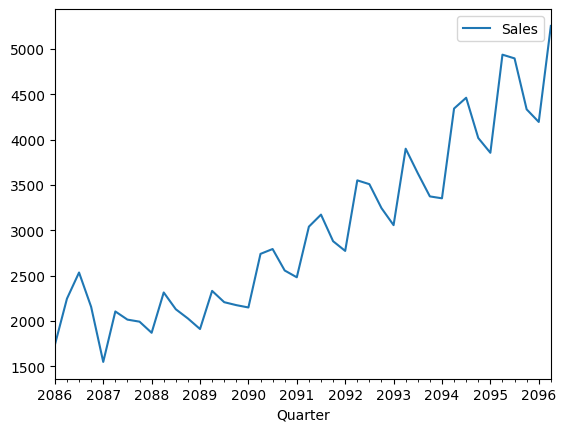

In [ ]:
series.plot()

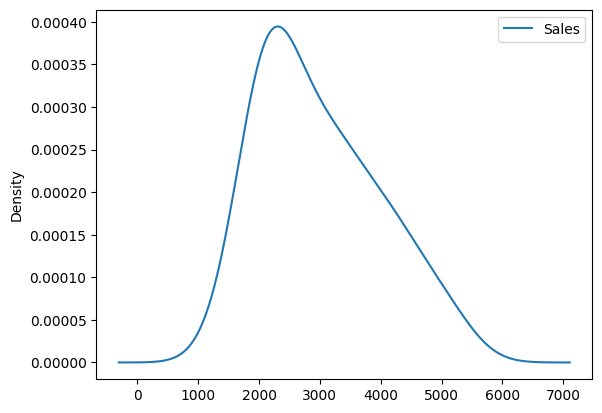

In [ ]:
series.plot(kind='kde')
plt.show()

Text(0, 0.5, 'Quarter')

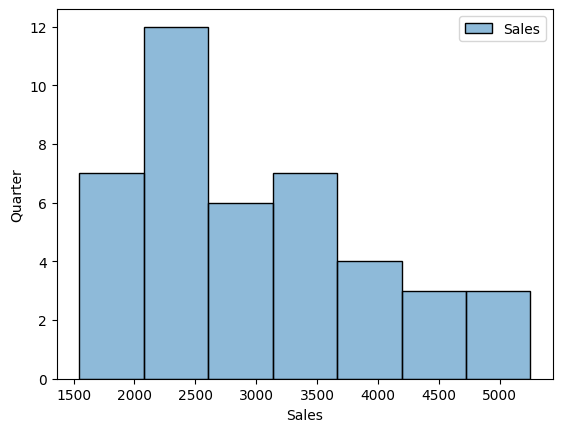

In [ ]:
sns.histplot(series)
# plt.xticks(rotation=45)
plt.xlabel('Sales')
plt.ylabel('Quarter')

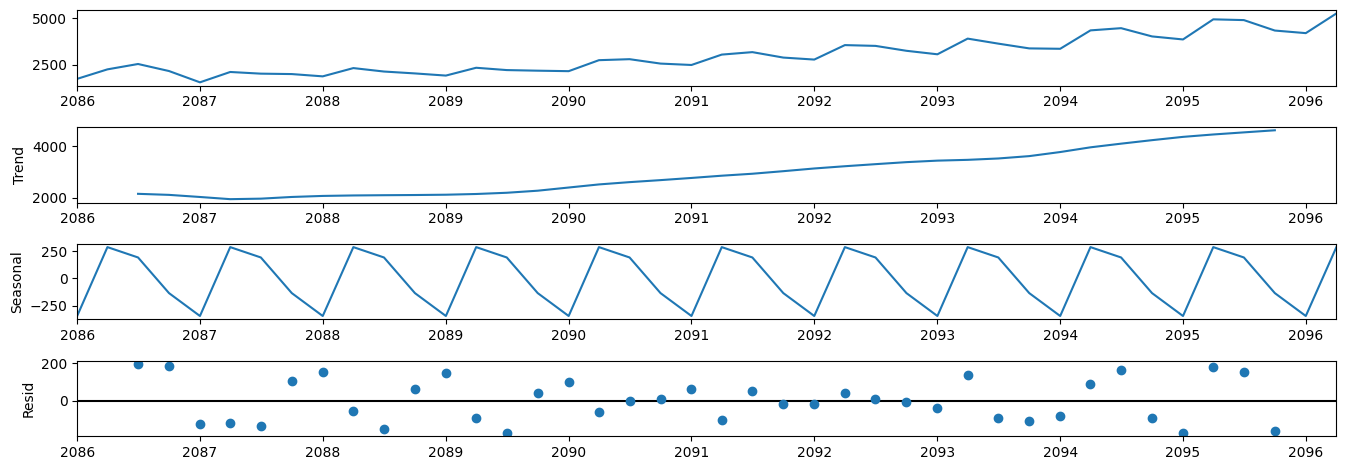

In [ ]:
import statsmodels.api as sm


def check_decomposition(x):
  decomposition = sm.tsa.seasonal_decompose(x,model='additive',period=4)


  decomposition.plot().set_figwidth(15)




check_decomposition(series)


Results of Dickey-Filler Test
Test Statistic                  1.309421
p-value                         0.996661
#Lags used                      7.000000
Number of Observations Used    34.000000
Critical value (1%)            -3.639224
Critical value (5%)            -2.951230
Critical value (10%)           -2.614447
dtype: float64




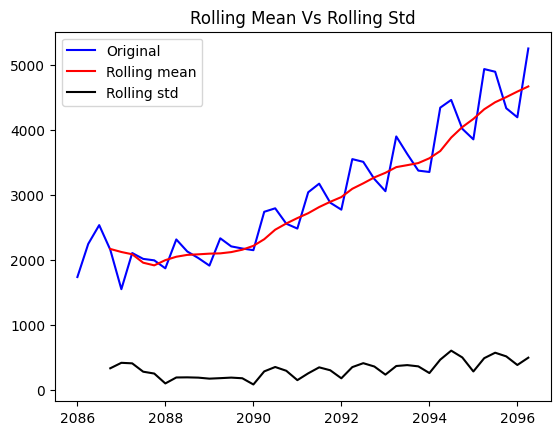

In [ ]:
# moving average
from statsmodels.tsa.stattools import adfuller

def check_seasonality(x):

    rollmean = x.rolling(window=4).mean()
    rollstd = x.rolling(window=4).std()
    plt.plot(x,color='blue',label='Original')
    plt.plot(rollmean,color='red',label='Rolling mean')
    plt.plot(rollstd,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean Vs Rolling Std')

    print('Results of Dickey-Filler Test')
    df_test = adfuller(x)
    df_output = pd.Series(df_test[0:4],index= ['Test Statistic','p-value','#Lags used','Number of Observations Used'])

    for key,value in df_test[4].items():
      df_output['Critical value (%s)' %key] = value
    print(df_output)
    print('\n')



check_seasonality(series)


Results of Dickey-Filler Test
Test Statistic                  0.192820
p-value                         0.971856
#Lags used                      6.000000
Number of Observations Used    35.000000
Critical value (1%)            -3.632743
Critical value (5%)            -2.948510
Critical value (10%)           -2.613017
dtype: float64




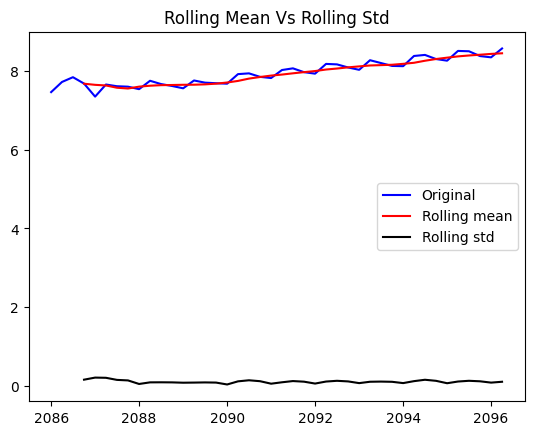

In [ ]:
series_log = np.log(series)
check_seasonality(series_log)

In [ ]:
moving_avg = series_log.rolling(window=4).mean()
moving_avg.dropna(inplace=True)

In [ ]:
dataLogScaleMinusMovingAvg = series_log - moving_avg
dataLogScaleMinusMovingAvg.dropna(inplace=True)

Results of Dickey-Filler Test
Test Statistic                 -4.715896
p-value                         0.000079
#Lags used                      4.000000
Number of Observations Used    34.000000
Critical value (1%)            -3.639224
Critical value (5%)            -2.951230
Critical value (10%)           -2.614447
dtype: float64




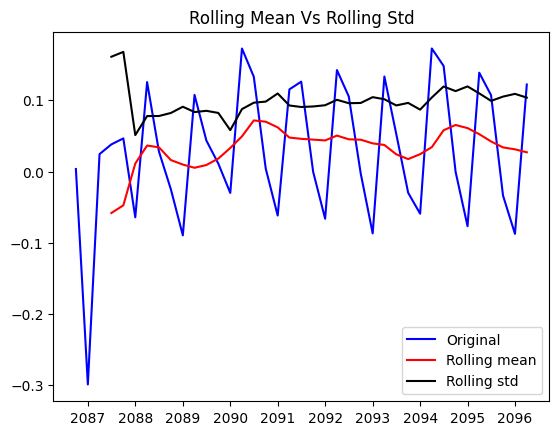

In [ ]:
check_seasonality(dataLogScaleMinusMovingAvg)

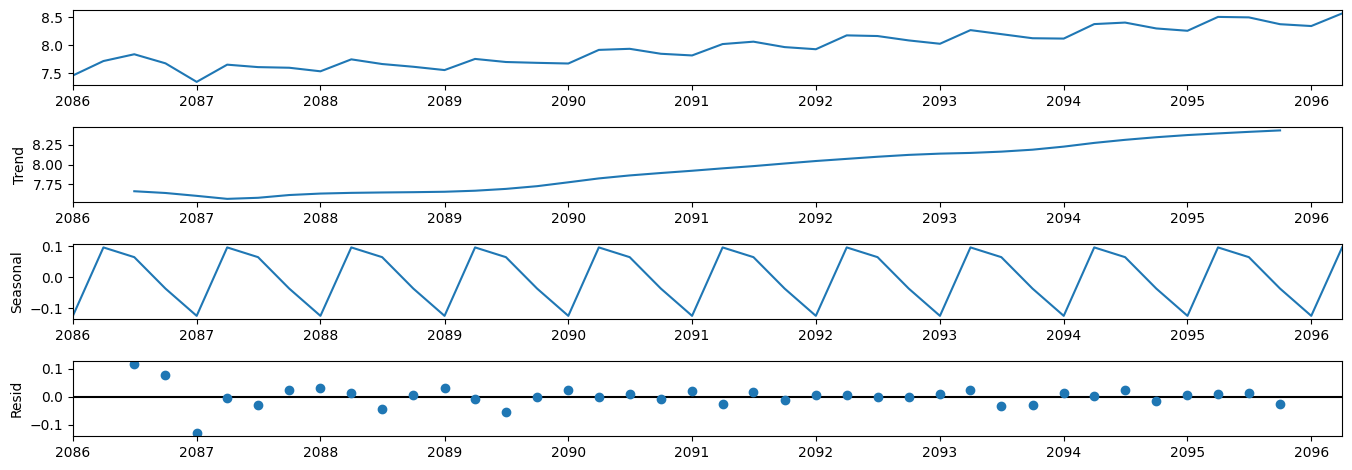

In [ ]:
check_decomposition(series_log)

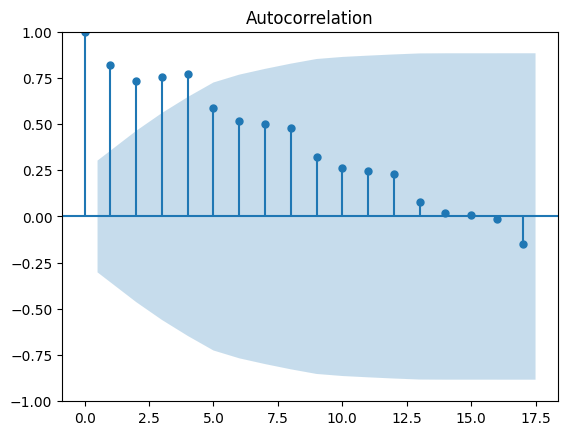

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(series_log);


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


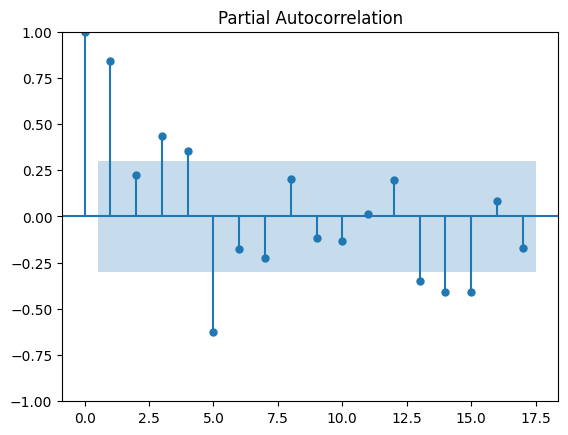

In [ ]:
plot_pacf(series_log);

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.9 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(series_log, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-34.297, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=295.446, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.45 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-32.537, Time=0.60 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-38.455, Time=0.47 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=0.220, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-34.764, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-35.138, Time=1.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-38.238, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=26.525, Time=1.16 sec
 ARIMA(0,

In [ ]:
X_train = series_log.iloc[:38]
X_test  = series_log.iloc[39:]
print(f'X_train : {X_train.shape}, X_test : {X_test.shape}')

X_train : (38, 1), X_test : (3, 1)


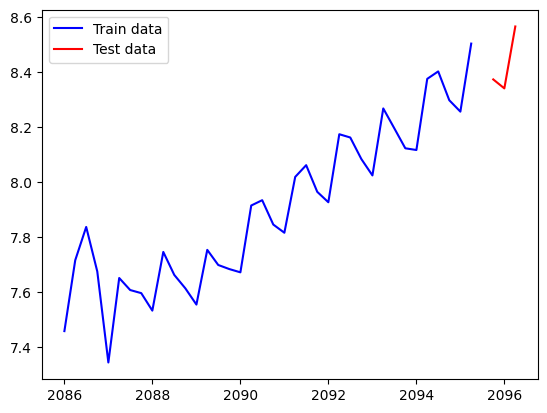

In [ ]:
plt.plot(X_train,label='Train data',color='blue')
plt.plot(X_test,label='Test data',color='red')
plt.legend()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


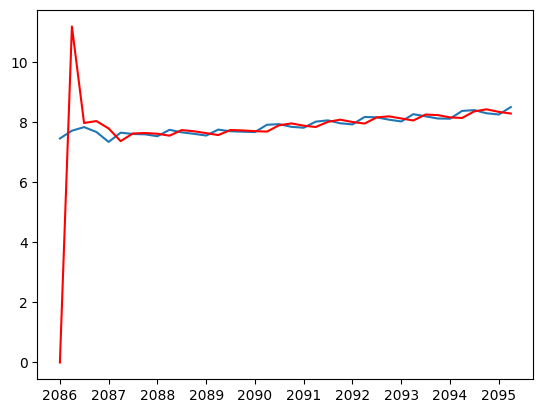

In [ ]:
from statsmodels.tsa.arima.model import ARIMA




model = ARIMA(X_train,order=(1,2,1))



result_arima = model.fit()

plt.plot(X_train)
plt.plot(result_arima.fittedvalues,color='red')






In [ ]:
X_test.shape

(3, 1)

In [ ]:
result1 = result_arima.predict(start=40,end=42)
from sklearn.metrics import mean_absolute_percentage_error
print(np.sqrt(mean_absolute_percentage_error(X_test,result1)))


0.13358058626980385


<Axes: xlabel='Quarter'>

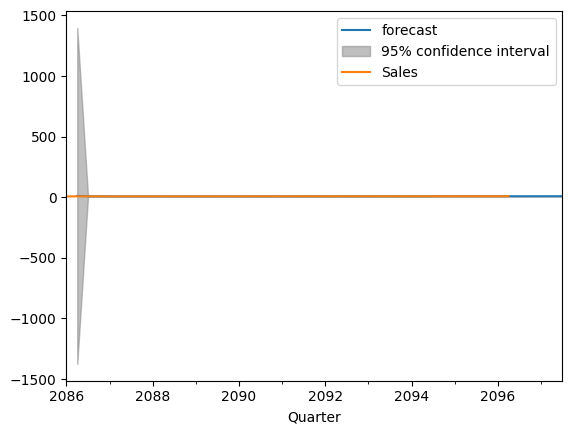

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict



plot_predict(result_arima,start=1,end=46)
series_log['Sales'].plot(legend=True)